### Test Code for Module KNN

In [1]:
include("./script.jl")
import .KNN

In [2]:
import Random
import Plots

In [3]:
include("../tools.jl")
import .JuTools

In [4]:
# prepare data, no need to scale
linear_func = m -> 2 * m - 20
X_data, Y_data = JuTools.data_generate_linear_2d(linear_func=linear_func, data_size=500, 
    range_min=0.0, range_max=100.0, random_scale=20.0)
println(size(X_data))
println(size(Y_data))

(500, 2)
(500,)


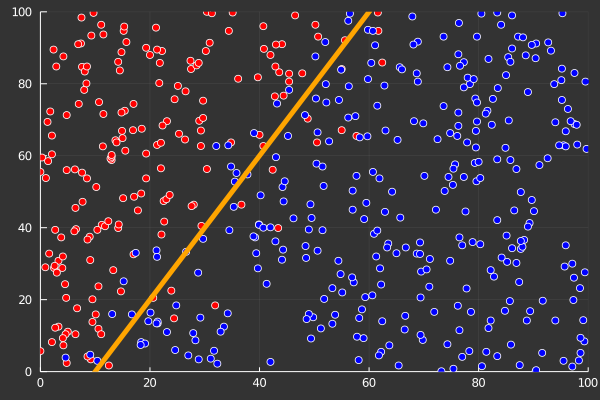

In [5]:
# plot the data
plot_X1 = [X_data[i, 1] for i in 1:(size(X_data)[1]) if Y_data[i] == 0]
plot_Y1 = [X_data[i, 2] for i in 1:(size(X_data)[1]) if Y_data[i] == 0]
plot_X2 = [X_data[i, 1] for i in 1:(size(X_data)[1]) if Y_data[i] == 1]
plot_Y2 = [X_data[i, 2] for i in 1:(size(X_data)[1]) if Y_data[i] == 1]
plot_X3 = [i for i in 0:100]
plot_Y3 = [linear_func(m) for m in plot_X3]
Plots.gr()
Plots.scatter(plot_X1, plot_Y1, leg=false, c="red", background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
Plots.plot!(plot_X3, plot_Y3, leg=false, c="orange", linewidth=5)
Plots.xlims!((0.0, 100.0))
Plots.ylims!((0.0, 100.0))

### Naive Approach

In [6]:
# plot contour
X_test_1 = 0:1:100
X_test_2 = 0:1:100
f_test(X1, X2) = begin
   KNN.predict_naive([X1, X2], X_data, Y_data, K=5)[1] 
end

f_test (generic function with 1 method)

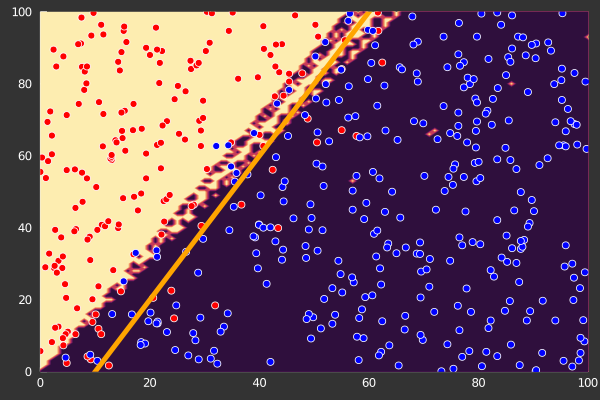

In [7]:
Plots.gr()
Plots.contour(X_test_1, X_test_2, f_test, leg=false, fill=true, c=:matter,
    linewidth=0, background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X1, plot_Y1, leg=false, c="red")
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
Plots.plot!(plot_X3, plot_Y3, leg=false, c="orange", linewidth=5)
Plots.xlims!((0.0, 100.0))
Plots.ylims!((0.0, 100.0))

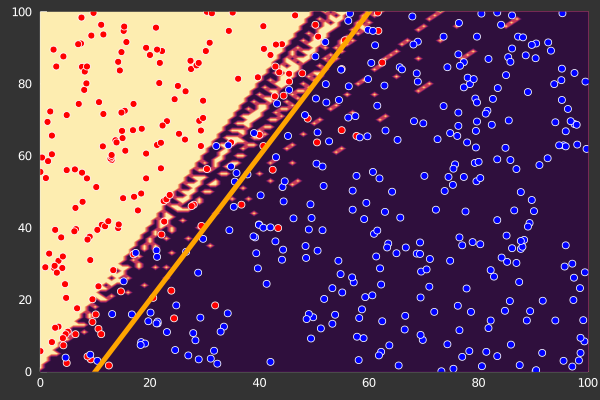

In [8]:
# test with different Ks
f_test(X1, X2) = begin
   KNN.predict_naive([X1, X2], X_data, Y_data, K=2)[1] 
end

Plots.gr()
Plots.contour(X_test_1, X_test_2, f_test, leg=false, fill=true, c=:matter,
    linewidth=0, background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X1, plot_Y1, leg=false, c="red")
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
Plots.plot!(plot_X3, plot_Y3, leg=false, c="orange", linewidth=5)
Plots.xlims!((0.0, 100.0))
Plots.ylims!((0.0, 100.0))

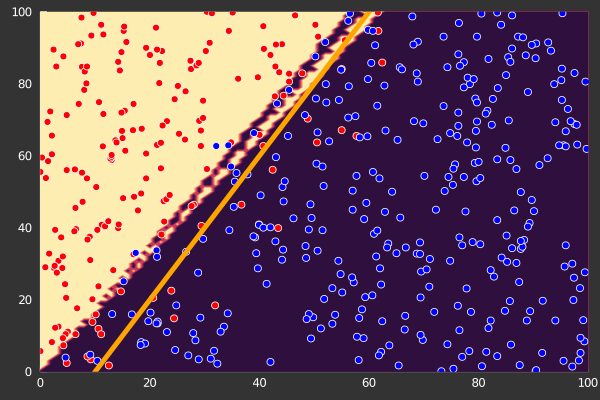

In [9]:
f_test(X1, X2) = begin
   KNN.predict_naive([X1, X2], X_data, Y_data, K=10)[1] 
end

Plots.gr()
Plots.contour(X_test_1, X_test_2, f_test, leg=false, fill=true, c=:matter,
    linewidth=0, background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X1, plot_Y1, leg=false, c="red")
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
Plots.plot!(plot_X3, plot_Y3, leg=false, c="orange", linewidth=5)
Plots.xlims!((0.0, 100.0))
Plots.ylims!((0.0, 100.0))

With larger `K`, the algorithm can find the boundary more easily

### K-d Tree Approach

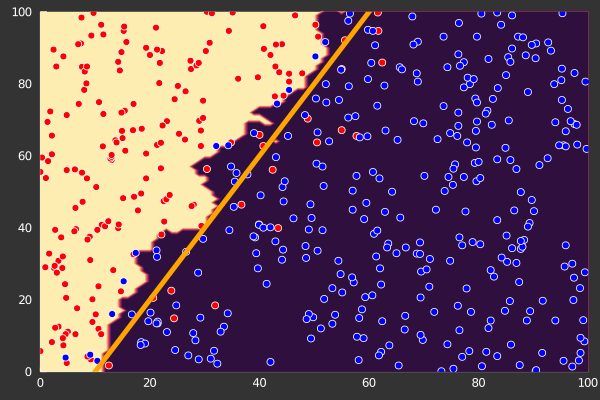

In [10]:
kdtree = KNN.create_kdtree(X_data, Y_data)

f_test(X1, X2) = begin
   KNN.predict_kdtree([X1, X2], kdtree, K=10)[1] 
end

Plots.gr()
Plots.contour(X_test_1, X_test_2, f_test, leg=false, fill=true, c=:matter,
    linewidth=0, background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X1, plot_Y1, leg=false, c="red")
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
Plots.plot!(plot_X3, plot_Y3, leg=false, c="orange", linewidth=5)
Plots.xlims!((0.0, 100.0))
Plots.ylims!((0.0, 100.0))

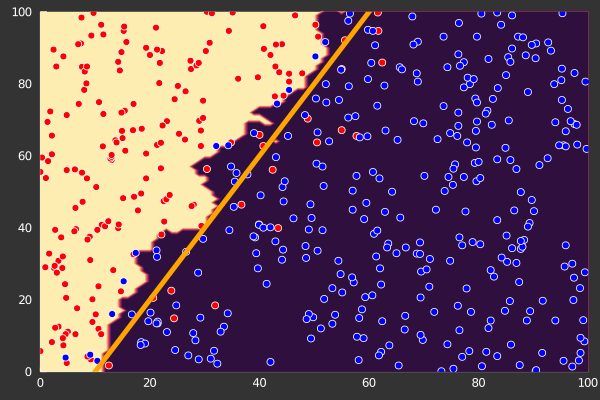

In [11]:
f_test(X1, X2) = begin
   KNN.predict_kdtree([X1, X2], kdtree, K=2)[1] 
end

Plots.gr()
Plots.contour(X_test_1, X_test_2, f_test, leg=false, fill=true, c=:matter,
    linewidth=0, background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X1, plot_Y1, leg=false, c="red")
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
Plots.plot!(plot_X3, plot_Y3, leg=false, c="orange", linewidth=5)
Plots.xlims!((0.0, 100.0))
Plots.ylims!((0.0, 100.0))

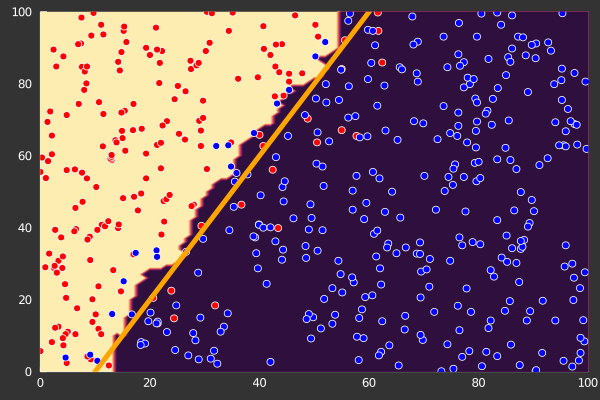

In [13]:
f_test(X1, X2) = begin
   KNN.predict_kdtree([X1, X2], kdtree, K=30)[1] 
end

Plots.gr()
Plots.contour(X_test_1, X_test_2, f_test, leg=false, fill=true, c=:matter,
    linewidth=0, background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X1, plot_Y1, leg=false, c="red")
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
Plots.plot!(plot_X3, plot_Y3, leg=false, c="orange", linewidth=5)
Plots.xlims!((0.0, 100.0))
Plots.ylims!((0.0, 100.0))

With larger `K`, the boundary is more linear

In [16]:
# compare time
@time KNN.predict_naive(X_data, X_data, Y_data, K=10)

  0.077927 seconds (507.00 k allocations: 32.240 MiB, 14.33% gc time)


500-element Array{Number,1}:
 1
 1
 1
 1
 1
 1
 0
 0
 1
 0
 1
 0
 1
 ⋮
 1
 1
 1
 0
 1
 1
 0
 1
 1
 1
 1
 1

In [17]:
@time KNN.predict_kdtree(X_data, kdtree, K=10)

  0.016649 seconds (240.47 k allocations: 7.068 MiB)


500-element Array{Number,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 0.0
 0.0
 1.0
 0.0
 1.0
 0.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 0.0
 1.0
 0.0
 0.0
 1.0
 1.0
 1.0
 1.0
 1.0

We see that K-d Tree approach is faster than naive approach